Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [130]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score as sil
import scipy.cluster.hierarchy as sch
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [131]:
wine=pd.read_csv("wine.csv")
wine.sample(6)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
161,3,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
72,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
49,1,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260
24,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
98,2,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660


In [132]:
#Pre-Processing
df=wine.iloc[:,1:]
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [133]:
np.matmul(df.T,df).shape

(13, 13)

In [134]:
x,v=np.linalg.eig(np.matmul(df.T,df))
data=pd.DataFrame(np.matmul(df,v).values,columns=["PCA_FE1","PCA_FE2","PCA_FE3","PCA_FE4","5CA_FE5","PCA_FE6","PCA_FE7",
                                                  "PCA_FE8","PCA_FE9","PCA_FE10","PCA_FE11","PCA_FE112","PCA_FE13"])
data['Type']=wine['Type']
data

,PCA_FE1,PCA_FE2,PCA_FE3,PCA_FE4,5CA_FE5,PCA_FE6,PCA_FE7,PCA_FE8,PCA_FE9,PCA_FE10,PCA_FE11,PCA_FE112,PCA_FE13,Type
0,1072.758361,-0.967325,8.180732,-0.086682,-0.627442,0.393417,-0.225533,-0.045417,-0.678850,-0.139323,-0.042782,-0.097565,-0.063881,1
1,1054.621609,24.310812,5.766239,0.232694,-1.879493,-0.751538,0.306676,0.519215,-0.308647,-0.011858,-0.073247,-0.012821,-0.028549,1
2,1188.953065,37.591312,-1.640828,0.746878,0.307064,0.354486,-1.029841,-0.637244,-0.026737,-0.192692,-0.253799,-0.039243,0.029210,1
3,1483.244108,61.293558,1.007654,-0.789739,0.100030,0.749378,-0.724307,0.206293,-0.056846,0.522824,0.121212,-0.178492,-0.016842,1
4,744.147210,-32.575308,2.977988,1.030035,0.515590,0.168963,-0.698714,0.223005,0.204103,0.044514,-0.287822,-0.060426,-0.001751,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,746.463207,-10.014892,-3.451547,-3.361156,-0.001890,-2.613621,-0.880429,0.058128,-0.039678,0.084856,-0.015407,0.089821,-0.021840,3
174,757.244278,-16.010371,-3.618038,-2.227868,1.347017,-0.966521,-0.150978,-0.279537,0.168224,0.145761,0.064675,-0.005184,0.048130,3
175,843.673409,-22.567614,2.894776,-5.463346,1.698582,-0.717548,-0.680679,-0.052559,-0.285491,-0.027248,0.196155,0.134451,-0.042477,3
176,848.627607,-21.891097,3.210111,-4.313665,1.875884,0.300265,0.376291,-0.233105,-0.259467,0.068281,0.021699,-0.033306,-0.138389,3


In [150]:
data1=pd.DataFrame()
data1['PCA_FE1']=data['PCA_FE1']
data1['PCA_FE2']=data['PCA_FE2']
data1['PCA_FE3']=data['PCA_FE3']
scaler=MinMaxScaler()
data2=scaler.fit_transform(data1)
data3=pd.DataFrame(data2)

#F_data['Type']=wine['Type']
data3
data4=data3

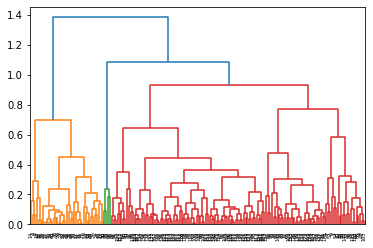

In [143]:
dend=sch.dendrogram(sch.linkage(data3,method='complete'))

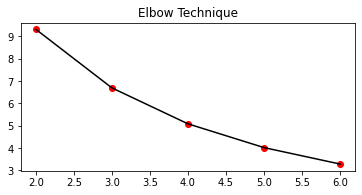

<function matplotlib.pyplot.show(close=None, block=None)>

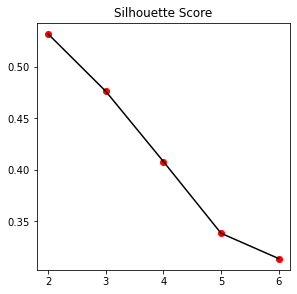

In [144]:
nc=[2,3,4,5,6]
score=[]
score1=[]
for i in nc:
    km=KMeans(i)
    km.fit(data3)
    score.append(km.inertia_)
    hc=AgglomerativeClustering(n_clusters=i,affinity='manhattan',linkage='average')
    hc.fit(data3)
    y=hc.fit_predict(data3)
    score1.append(sil(data3,y))
    
    
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.title("Elbow Technique")
plt.plot(nc,score,color="black")
plt.scatter(nc,score,color="red")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Silhouette Score")
plt.plot(nc,score1,color="black")
plt.scatter(nc,score1,color="red")
plt.show

In [152]:
#K_means Final Model

km_clu=KMeans(n_clusters=3,max_iter=600,algorithm='auto')
km_clu.fit(data3)
KM_CLU_ID=pd.Series(km_clu.labels_)

#data3['KM_CLU_ID']=labels

In [153]:
KM_CLU_ID.value_counts()

0    98
1    44
2    36
dtype: int64

In [149]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [156]:
#Hirarchical Fianl Model

Hir_clu=AgglomerativeClustering(n_clusters=3,affinity='manhattan',linkage='average')
Hir_clu.fit(data4)
Hir_Clu_ID=pd.Series(Hir_clu.fit_predict(data4))


In [157]:
Hir_Clu_ID.value_counts()

1    120
0     48
2     10
dtype: int64

In [163]:
print("K_Means Clustering :")
print(classification_report(wine['Type'],KM_CLU_ID))
print("Hirachical Clustering :")
print(classification_report(wine['Type'],Hir_Clu_ID))

K_Means Clustering :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.85        59
           2       0.39      0.20      0.26        71
           3       0.00      0.00      0.00        48

    accuracy                           0.33       178
   macro avg       0.35      0.24      0.28       178
weighted avg       0.49      0.33      0.39       178

Hirachical Clustering :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.06      0.12      0.08        59
           2       0.50      0.07      0.12        71
           3       0.00      0.00      0.00        48

    accuracy                           0.07       178
   macro avg       0.14      0.05      0.05       178
weighted avg       0.22      0.07      0.08       178



In [ ]:
#As the Given data is non-linear data,PCA does not work well with Non-linear data